<a href="https://colab.research.google.com/github/laura-DGM/Colaboratory/blob/main/citron239.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

citron 239

por:
* laura Alejandra Espitia Mora

In [ ]:
#Librerías
from   numpy import exp, array, random, dot
import numpy as np
import matplotlib.pyplot as plt

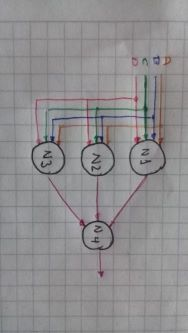

tablas de verdad

chocolate :A   |   chocolate :B
chocolate :C   |   chocolate :D

*estados:*

0:todo ok    |    1:chocolates parte superior     |    2:chocolates parte inferior     |    3:chocolates a la izquierda     |    4:chocolates a la derecha      |    5:faltan mas o dos chocolates   |    6:faltan menos de dos chocolates   |    7:no hay chocolates

*   A B C D estado
*   0 0 0 0 =  7
*   0 0 0 1 =  5
*   0 0 1 0 =  5
*   0 0 1 1 =  2
*   0 1 0 0 =  5
*   0 1 0 1 =  4
*   0 1 1 0 =  5
*   0 1 1 1 =  6
*   1 0 0 0 =  5
*   1 0 0 1 =  5
*   1 0 1 0 =  3
*   1 0 1 1 =  6
*   1 1 0 0 =  1
*   1 1 0 1 =  6
*   1 1 1 0 =  6
*   1 1 1 1 =  0


*   A B C D =  N1| N2| N3| N4
*   0 0 0 0 =  1 | 1 | 1 | 1
*   0 0 0 1 =  1 | 0 | 1 | 1
*   0 0 1 0 =  1 | 0 | 1 | 1
*   0 0 1 1 =  0 | 1 | 0 | 1
*   0 1 0 0 =  1 | 0 | 1 | 1
*   0 1 0 1 =  1 | 0 | 0 | 1
*   0 1 1 0 =  1 | 0 | 1 | 1
*   0 1 1 1 =  1 | 1 | 0 | 1
*   1 0 0 0 =  1 | 0 | 1 | 1
*   1 0 0 1 =  1 | 0 | 1 | 1
*   1 0 1 0 =  0 | 1 | 1 | 1
*   1 0 1 1 =  1 | 1 | 0 | 1
*   1 1 0 0 =  0 | 0 | 1 | 1
*   1 1 0 1 =  1 | 1 | 0 | 1
*   1 1 1 0 =  1 | 1 | 0 | 1
*   1 1 1 1 =  0 | 0 | 0 | 0













In [ ]:
#parametros
#Epoch:
epochs = 2000
#tasa de aprendizaje
alfa   = 0.7

In [ ]:
#Perceptrón
class NeuralNetwork():
    def __init__(self):
        # Inicializar la semilla del generador aleatorio para que siempre de los mismos numeros
        # cada vez que el programa corra
        random.seed(1)

        # Modelo de una sola neurona, con una conexion de salida y tres de entrada.
        # asignamos pesos aleatorios a una matriz 4 x 1, con los valores en el rango -1 a 1
        # y media 0.
        self.synaptic_weights = 2 * random.random((4, 1)) -1
        self.error_history = []
        self.epoch_list = []
    # La función sigmoidea, que describe una función en forma de s, es la función de activación.
    # Nosotros hacemos pasar la suma de los pesos a través de dicha función para normalizarla entre 0 y 1 (porque eso es lo que esperamos) y así poder dar un resultado
    def __sigmoid(self, x):

        return 1 / (1 + exp(-x))
        #return np.tanh(x)
        #return x * (x > 0)

    # La derivada de la función sigmoidea
    # es el gradiente descendiente de la función sigmoidea
    # Indica qué tanto "le creemos" a los pesos resultantes, revisar link.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
        #return 1 - x**2
        #return x > 0

    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Ajustamos los pesos sinápticos en cada iteración
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pasamos el conjunto de entrenamiento a través de la red neuronal (una única neurona).
            output = self.think(training_set_inputs)

            # Calculamos el error (La diferencia entre el valor que esperamos obtener realmente
            # y la salida predicha).
            self.error = training_set_outputs - output
            # Multiplique el error por la entrada y de nuevo por el gradiente descendiente de la función sigmoidea.
            # Esto significa que los pesos menos confiables se ajustan más (filtrado)
            # Esto significa que las entradas, que son cero, no causan cambio a los pesos.
            adjustment = dot(training_set_inputs.T, self.error * self.__sigmoid_derivative(output))


            # Ajustar los pesos.
            self.synaptic_weights += (adjustment*alfa)
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(iteration)
    #Proceso de aprendizaje de la red neuronal:
    def think(self, inputs):
        # Pasamos las entradas a través de la red neuronal (una única neurona).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
    def nor(self,inputs,training_set_outputs):

        Y=(self.think(inputs)-min(training_set_outputs  ))*(1 - 0)/(max(training_set_outputs)-min(training_set_outputs));
        #Y=(self.think(inputs)-min(training_set_outputs  ))*(-1 - 0)/(max(training_set_outputs)-min(training_set_outputs))
        #Y=(self.think(inputs)-min(training_set_outputs  ))*(6.28 - 0)/(max(training_set_outputs)-min(training_set_outputs))
        if Y <0.5:
          Y=0
        else:
          Y=1
        return Y


In [ ]:
#Perceptrón
class NeuralNetwork_1():
    def __init__(self):
        # Inicializar la semilla del generador aleatorio para que siempre de los mismos numeros
        # cada vez que el programa corra
        random.seed(1)

        # Modelo de una sola neurona, con una conexion de salida y tres de entrada.
        # asignamos pesos aleatorios a una matriz 3 x 1, con los valores en el rango -1 a 1
        # y media 0.
        self.synaptic_weights = 2 * random.random((3, 1)) -1
        self.error_history = []
        self.epoch_list = []
    # La función sigmoidea, que describe una función en forma de s, es la función de activación.
    # Nosotros hacemos pasar la suma de los pesos a través de dicha función para normalizarla entre 0 y 1 (porque eso es lo que esperamos) y así poder dar un resultado
    def __sigmoid(self, x):

        return 1 / (1 + exp(-x))


    # La derivada de la función sigmoidea
    # es el gradiente descendiente de la función sigmoidea
    # Indica qué tanto "le creemos" a los pesos resultantes, revisar link.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)


    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Ajustamos los pesos sinápticos en cada iteración
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pasamos el conjunto de entrenamiento a través de la red neuronal (una única neurona).
            output = self.think(training_set_inputs)

            # Calculamos el error (La diferencia entre el valor que esperamos obtener realmente
            # y la salida predicha).
            self.error = training_set_outputs - output
            # Multiplique el error por la entrada y de nuevo por el gradiente descendiente de la función sigmoidea.
            # Esto significa que los pesos menos confiables se ajustan más (filtrado)
            # Esto significa que las entradas, que son cero, no causan cambio a los pesos.
            adjustment = dot(training_set_inputs.T, self.error * self.__sigmoid_derivative(output))


            # Ajustar los pesos.
            self.synaptic_weights += (adjustment*alfa)
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(iteration)
    #Proceso de aprendizaje de la red neuronal:
    def think(self, inputs):
        # Pasamos las entradas a través de la red neuronal (una única neurona).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
    def nor(self,inputs,training_set_outputs):

        Y=(self.think(inputs)-min(training_set_outputs  ))*(1 - 0)/(max(training_set_outputs)-min(training_set_outputs));
        if Y <=0.5:
          Y=0
        else:
          Y=1
        return Y

Pesos sinapticos iniciales generados aleatoriamente: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Nuevos pesos sinapticos después del entremaniento: 
[[0.37919664]
 [3.91527604]
 [3.90889727]]
Considerando las entradas: 
[0 0 0 0]
---------------------------
[0.5] [0.5] [0.5]
Considerando las entradas: 
[1 1 1]
la salida es: 
1
---------------------------


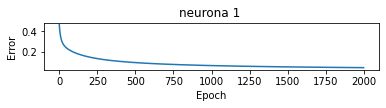

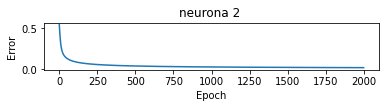

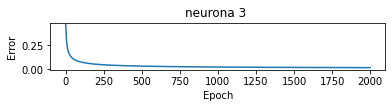

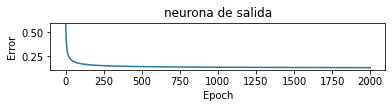

Iterations: 2000 Learning rate: 0.7


In [ ]:
#Clase principal
if __name__ == "__main__":

    neural_network_1 = NeuralNetwork()
    neural_network_2 = NeuralNetwork()
    neural_network_3 = NeuralNetwork()
    neural_network_4 = NeuralNetwork_1()
    print ("Pesos sinapticos iniciales generados aleatoriamente: ")
    print (neural_network_4.synaptic_weights)


    training_set_inputs = array([[0,0,1,1],[0,1,0,1],[0,1,1,1],[1,0,0,1],[1,0,1,0],[1,1,0,0],[1,0,0,1],[1,1,1,1]])
    training_set_outputs_1 = array([[ 0, 1, 1, 1, 0, 0, 1, 0]]).T
    training_set_outputs_2 = array([[ 1, 0, 1, 0, 1, 0, 0, 0]]).T
    training_set_outputs_3 = array([[ 0, 0, 0, 1, 1, 1, 1, 0]]).T

    training_set_inputs_1 = array([[1,1,1],[0,0,0],[0,0,1],[0,1,0]])
    training_set_outputs_4 = array([[1,0,1,1]]).T

    neural_network_1.train(training_set_inputs, training_set_outputs_1, epochs)
    neural_network_2.train(training_set_inputs, training_set_outputs_2, epochs)
    neural_network_3.train(training_set_inputs, training_set_outputs_3, epochs)
    neural_network_4.train(training_set_inputs_1, training_set_outputs_4, epochs)
    print ("Nuevos pesos sinapticos después del entremaniento: ")
    print (neural_network_4.synaptic_weights)

    test = array([0,0,0,0])
    print ("Considerando las entradas: ")
    print (test)
    print ("---------------------------")
    print (neural_network_1.think(test),neural_network_2.think(test),neural_network_3.think(test))
  #print (neural_network_1.nor(test,training_set_outputs_1),neural_network_2.nor(test,training_set_outputs_2),neural_network_3.nor(test,training_set_outputs_3))
    a=neural_network_1.nor(test,training_set_outputs_1)
    b=neural_network_2.nor(test,training_set_outputs_2)
    c=neural_network_3.nor(test,training_set_outputs_3)


    test_1=array([a,b,c])
    print ("Considerando las entradas: ")
    print (test_1)
    print ("la salida es: ")
    print (neural_network_4.nor(test_1,training_set_outputs_4))
    print ("---------------------------")
    plt.figure(1)
    plt.subplot(411)
    plt.title('neurona 1 ')
    plt.plot(neural_network_1.epoch_list, neural_network_1.error_history)
    plt.xlabel('Epoch')
    plt.ylabel('Error')

    plt.figure(2)
    plt.subplot(412)
    plt.title('neurona 2 ')
    plt.plot(neural_network_2.epoch_list, neural_network_2.error_history)
    plt.xlabel('Epoch')
    plt.ylabel('Error')

    plt.figure(3)
    plt.subplot(413)
    plt.title('neurona 3 ')
    plt.plot(neural_network_3.epoch_list, neural_network_3.error_history)
    plt.xlabel('Epoch')
    plt.ylabel('Error')

    plt.figure(4)
    plt.subplot(414)
    plt.title('neurona de salida')
    plt.plot(neural_network_4.epoch_list, neural_network_4.error_history)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.show()
    print ('Iterations:', epochs,'Learning rate:', alfa)

prueba de neuronas principales


*  [0.5]        [0.5]        [0.5]            1 1 1|111+
*  [0.99934567] [0.10488274] [0.06320346]     1 0 0|101
*  [0.00014766] [0.99914935] [0.04448246]     0 1 0|101
*  [0.18403783] [0.99278636] [0.00313101]     0 1 0|010+
*  [0.95906261] [0.0704251]  [0.04463953]     1 0 0|101
*  [0.99997205] [0.00879891] [0.00314254]     1 0 0|100+
*  [0.00344784] [0.98888713] [0.0021705]      0 1 0|101
*  [0.84086603] [0.91248523] [0.00014674]     1 1 0|110+
*  [0.00690944] [0.01008128] [0.99772723]     0 0 1|101
*  [0.91398624] [0.00119185] [0.96733917]     1 0 1|101+
*  [1.02748039e-06] [0.92284971] [0.95335055] 0 1 1|011+
*  [0.00156679] [0.58360724] [0.57962019]     0 1 1|110
*  [0.14015298] [0.00077095] [0.95351435]     0 0 1|001+
*  [0.99599908] [9.03949296e-05] [0.58051886] 1 0 1|110
*  [2.40707909e-05] [0.47540324] [0.48846521] 0 1 1|110
*  [0.03545998] [0.09599157] [0.06052559]     0 0 0|000+

Nota: si se sobre entrenan los perceptrones con los mismos datos de entrenamiento los datos de salidad disminuitan o aumentaran dependiendo si la salida es un 0 o un 1
* cuando el perceptron en sus datos entrenamiento de salida tienen un cero se disminuye los valores del aptendizaje y cuando es uno el valor aumenta
* por la condicion anterior, si el perceptron es entrenado con las 16 posibilidades del ejercicio los valores de salida seran menos exactos que si se usa solo el 50% de los datos
* esta neurona no es muy buena para el aprendizaje ya que como se observa en la prueba de aprendizaje principal,normalizar el aprendizaje es complicado ya que algunos valores en 0 son mas altos o mas pequeños del valor estandas y lo mismo pasa con los valores para una salida en 1
* aunque para la neurona 4 de salida si funciona muy bien el perceptron
* al probar otras funciones de aprendizaje sucedia el mis problema de la dificultad de cuadrar la normalizacion del perceptron, sumandole a esto el ajuste de las iteraciones y las epocas.